In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from numpy import mean, std, absolute

# Load your dataset
data = pd.read_csv('/content/drive/Shareddrives/RFID_23-24/3.1 Final Setup/dataset/condensed_data_all.csv')

# Define your predictors and target variable
predict = ['x', 'y']  # Assuming these are your target variables
X = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the Support Vector Regressor model
svr = SVR(kernel='rbf')  # You can change the kernel based on your data (e.g., 'linear', 'poly', 'rbf')
model_svr = MultiOutputRegressor(svr)

# Fit the model to the training data
model_svr.fit(x_train, y_train)

# Make predictions on the test set
predictions = model_svr.predict(x_test)

# Evaluate the performance of the model
y_train_pred = model_svr.predict(x_train)
print('R squared on training set:', r2_score(y_train, y_train_pred, multioutput='variance_weighted'))

# Define the evaluation procedure (Repeated K-Fold)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation and collect the scores
n_scores = cross_val_score(model_svr, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)  # Convert scores to positive

# Summarize performance
print('MSE with Cross-Validation: Mean=%.3f (STD=%.3f)' % (mean(n_scores), std(n_scores)))

# Calculate mean absolute error, mean squared error, and root mean squared error
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Print the evaluation metrics
print(f'MAE with test data: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


R squared on training set: 0.17885685777007887
MSE with Cross-Validation: Mean=8.132 (STD=1.076)
MAE with test data: 2.3153525573123455
MSE: 7.580994175962129
RMSE: 2.7531951463707305


In [ ]:
over_lap = []
for i in range(len(predictions)):
    if (predictions[i][0] == y_test[i][0] and predictions[i][1] == y_test[i][1]):
        over_lap.append(predictions[i])
over_lap

[]

<ipython-input-4-5423a35d7a3d>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')


Text(0.5, 1.0, 'Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

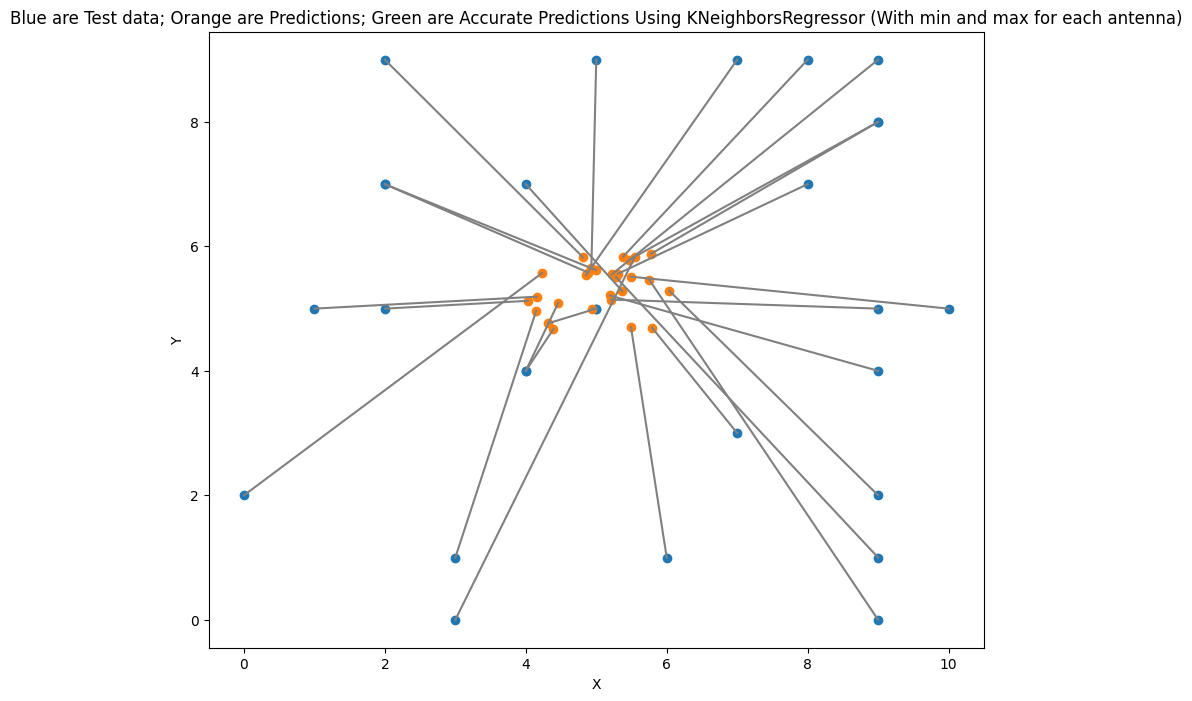

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(*zip(*y_test))
plt.scatter(*zip(*predictions))
# plt.scatter(*zip(*over_lap))
for i in range(0, len(y_test)):
    # if (y_test[i][0] == predictions[i][0] and y_test[i][1] == predictions[i][1]) :
    #     plt.plot(predictions[i])
    # else:
    plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')